# Red Wine Classification 

### Project by: Kishan Patel (200527734)

_____________________________________________________________________________________________________________________________

#### Importing the required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [14]:
# Load the red wine quality data
df = pd.read_csv("red_wine.csv")

#### Basic data exploration and EDA

In [15]:
#Displaying first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df.shape

(1599, 12)

As it can be seen that the dataframe has 1599 rows and 12 columns.

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
#Checking the datatype of the attributes and checking if it has missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can clearly see that none of the column has missing values.

In [19]:
#Renaming columns to elevate the scope of error in names. 
df.rename(columns = {'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace = True)

<AxesSubplot: >

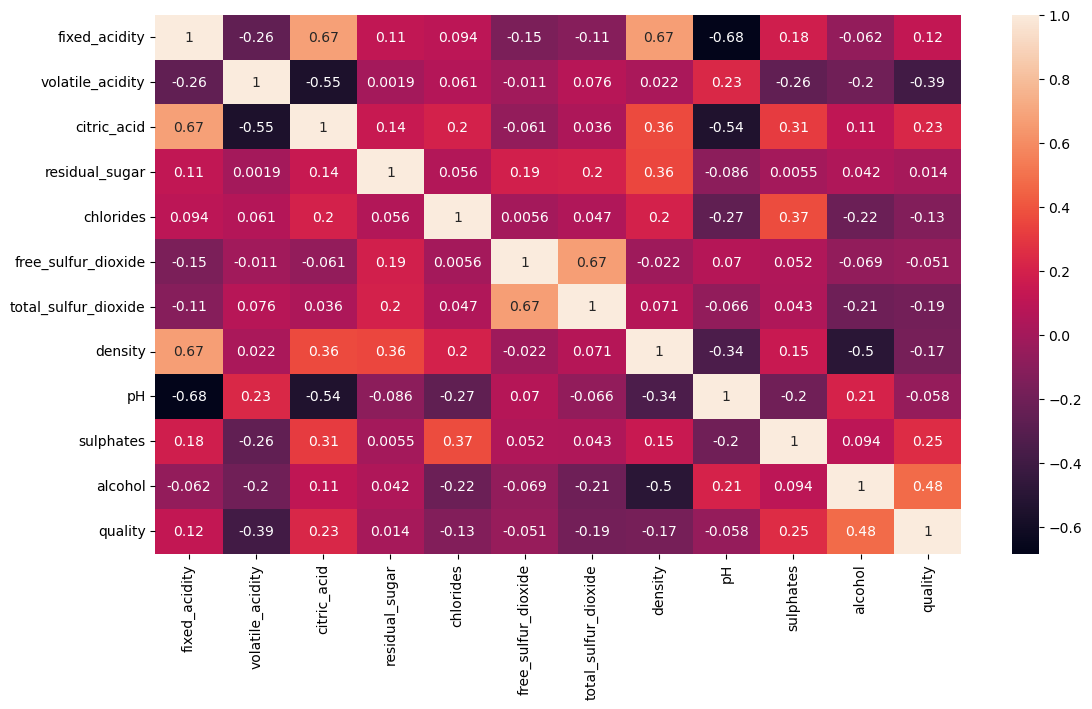

In [20]:
#Displaying the correlation heatmap
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot=True)

From the above correlation map, we can note that. . . 

1. Alcohol has comparatively high impact on the quality of wine than any other attribures.
2. fixed_acidity has positive and comparatively high correlation with citric_acid and density.
3. pH is negatively correlated with fixed_acidity and citric_acid.
4. Alcohol has moderately and negatively correlated with density.

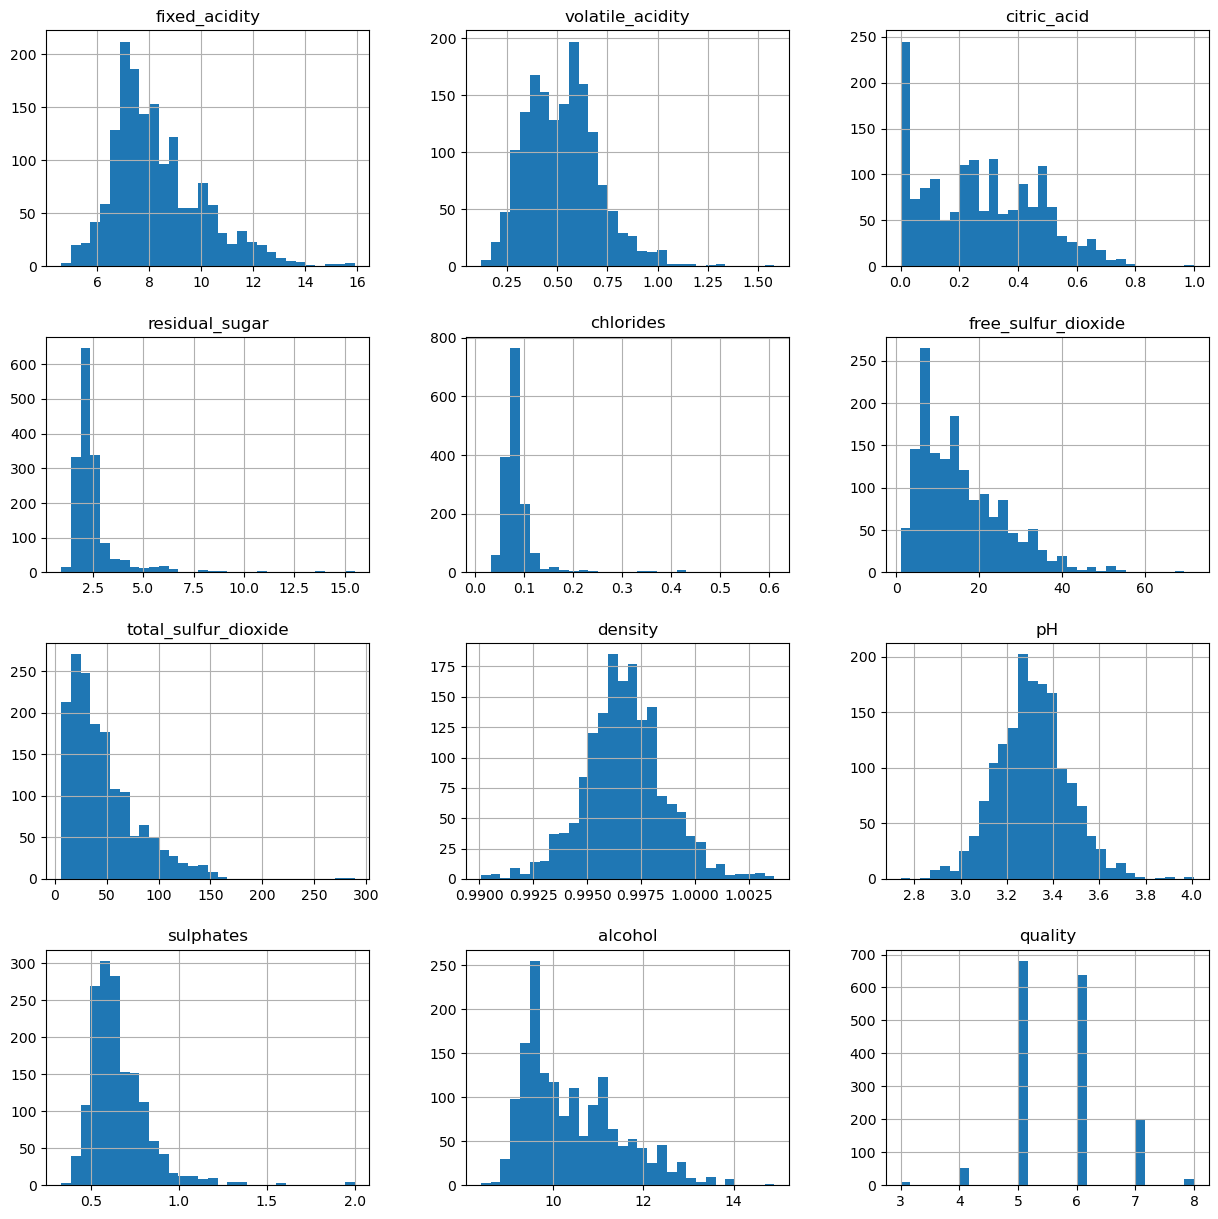

In [21]:
#Checking the distribution of the data using histogram
df.hist(bins=30, figsize = (15,15))
plt.show()

We can clearly note from the distribution that majority of the attributes are left-skewed that needs to be normally distributed. We will scale features in latter part. 

C:\Users\Admin1\AppData\Local\Temp\ipykernel_14640\3160255420.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist_kws=dict(edgecolor='k', linewidth=1, color='blue'), color='red')
C:\Users\Admin1\AppData\Local\Temp\ipykernel_14640\3160255420.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

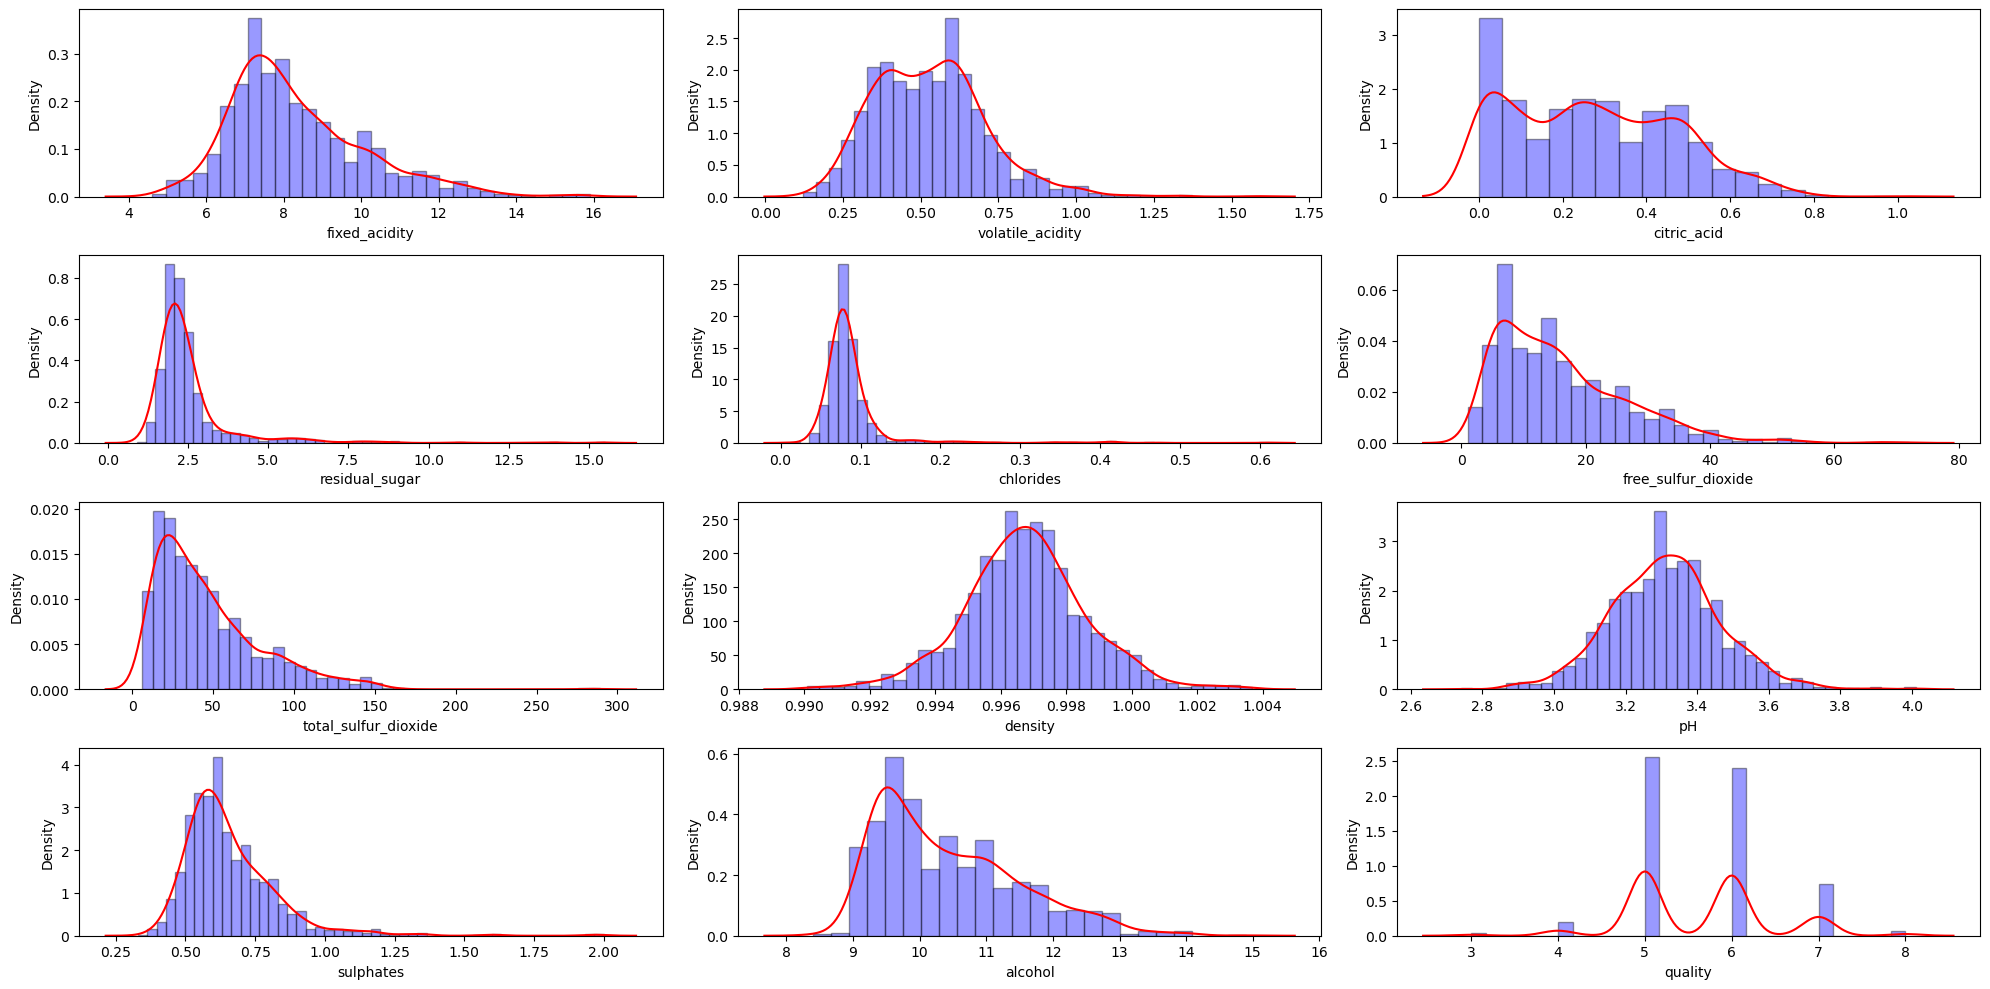

In [22]:
#Checking the distribution using distplot
plt.figure(figsize=(20,10))
col = df.columns
count = 1

for i in col:
    plt.subplot(4,3,count)
    sns.distplot(df[i], hist_kws=dict(edgecolor='k', linewidth=1, color='blue'), color='red')
    count+=1
plt.tight_layout()
plt.show()

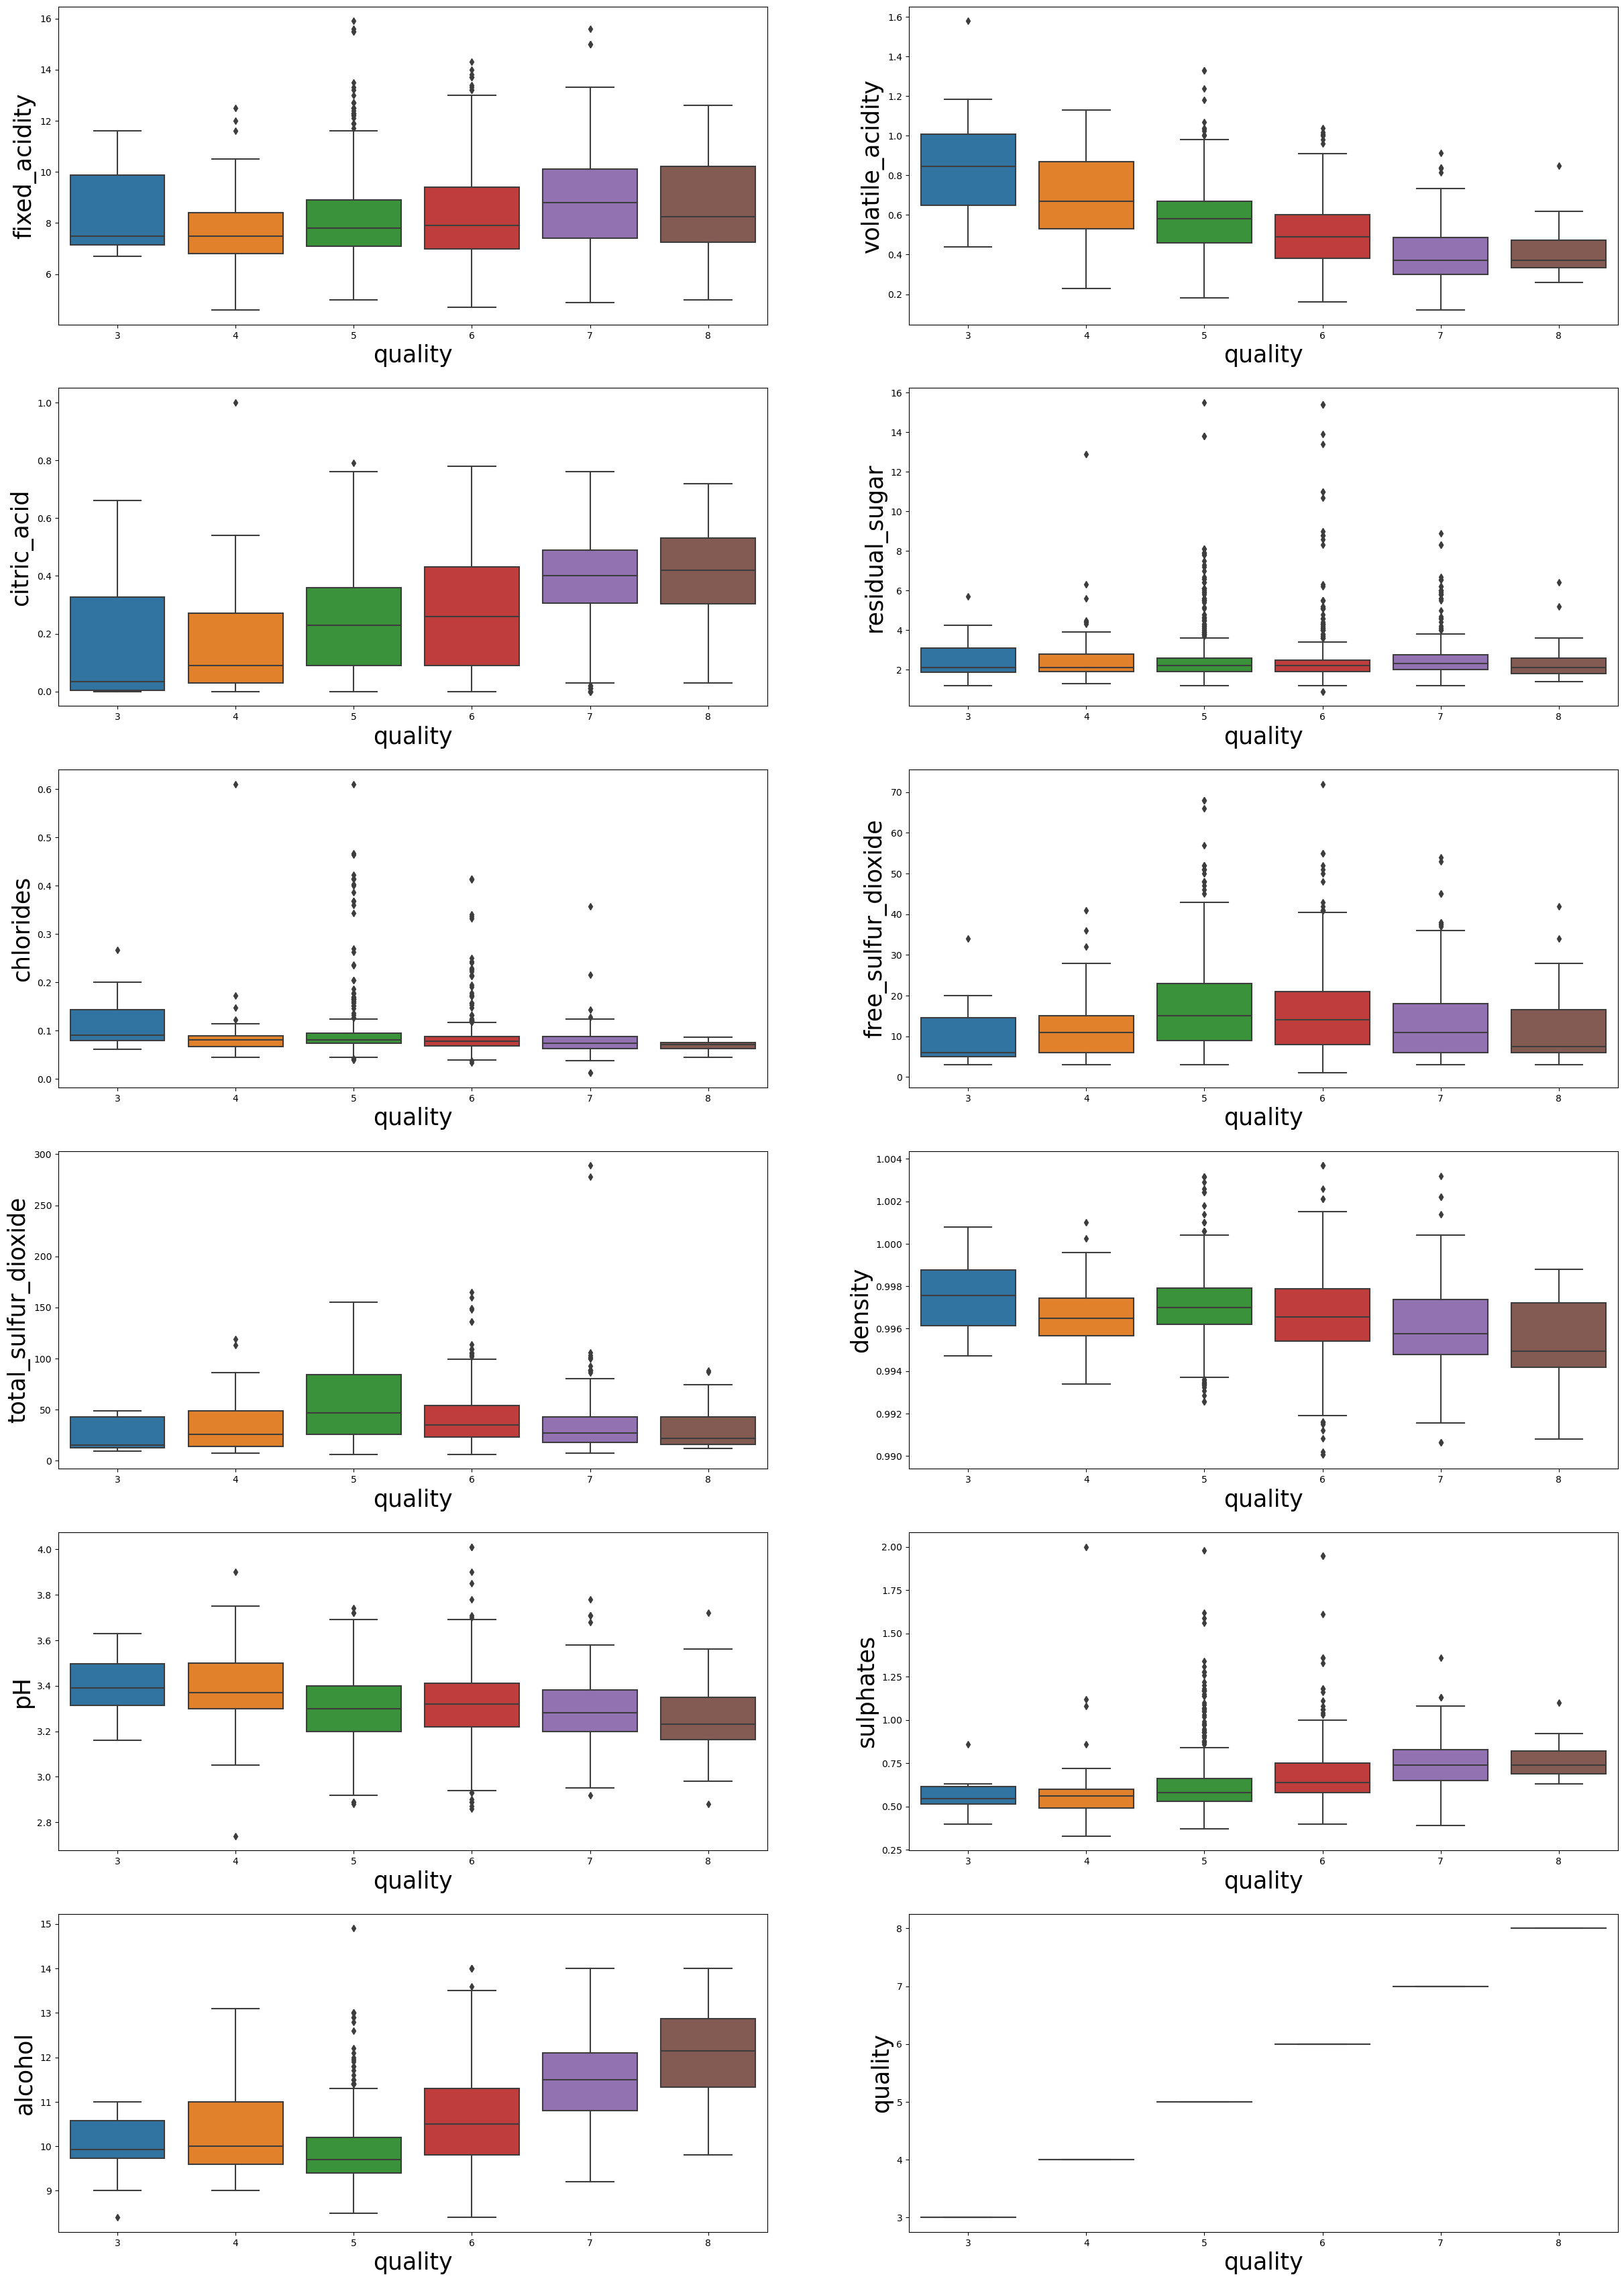

In [39]:
#Box plot to see how all the variables affect quality
i=1
plt.figure(figsize=(30,80))
for col in df.columns:
    plt.subplot(11,2,i)
    data = pd.DataFrame({'quality': df["quality"], col: df[col]})
    sns.boxplot(x="quality", y=col, data=data)
    plt.ylabel(col,fontsize=25)
    plt.xlabel("quality",fontsize=25)
    i=i+1
plt.show()

### Preprocessing the Data

In [40]:
X = df.drop(columns=['quality'])
y = df['quality']
y = np.where(y >= 6, 1, 0) # convert the target to binary

#### Splitting the dataset into train and test set (80:20)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Scaling the features using standard scalar

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Implement a Neural Network using TF Estimator DNN Classifier

In [43]:
#converting a class vector (integers) to binary class matrix
feat_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [44]:
#Input functions for training
def trainInput():
    dataset = tf.data.Dataset.from_tensor_slices((dict(pd.DataFrame(X_train, columns=X.columns)), y_train))
    dataset = dataset.shuffle(1000).repeat().batch(20)
    return dataset

def evalInput():
    dataset = tf.data.Dataset.from_tensor_slices((dict(pd.DataFrame(X_test, columns=X.columns)), y_test))
    return dataset.shuffle(1000).repeat().batch(10)

In [52]:
# Implement a Neural Network using TF Estimator DNN Classifier
dnn_model = tf.estimator.DNNClassifier(hidden_units=[64, 32, 16], 
                                       feature_columns=feat_cols,
                                       n_classes=2,
                                       activation_fn=tf.nn.relu,
                                       optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin1\\AppData\\Local\\Temp\\tmpg_zv219t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [53]:
# Train the model
dnn_model.train(input_fn=lambda: trainInput(), steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Admin1\AppData\Local\Temp\tmpg_zv219t\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6653142, step = 0
INFO:tensorflow:global_step/sec: 504.681
INFO:tensorflow:loss = 0.5528698, step = 100 (0.199 sec)
INFO:tensorflow:global_step/sec: 948.53
INFO:tensorflow:loss = 0.44912568, step = 200 (0.105 sec)
INFO:tensorflow:global_step/sec: 954.933
INFO:tensorflow:loss = 0.34804592, step = 300 (0.106 sec)
INFO:tensorflow:global_step/sec: 954.931
INFO:tensorflow:loss = 0.49519238, step = 400 (0.104 sec)
INFO:tensorflow:global_step/sec: 919.882
INFO:tensorflow:loss = 0.645296

In [54]:
evaluation_result = dnn_model.evaluate(input_fn=evalInput,steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-02-05T01:29:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin1\AppData\Local\Temp\tmpg_zv219t\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.61853s
INFO:tensorflow:Finished evaluation at 2023-02-05-01:29:38
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9, accuracy_baseline = 0.7, auc = 1.0, auc_precision_recall = 1.0, average_loss = 0.22658324, global_step = 2000, label/mean = 0.3, loss = 0.22658324, precision = 0.75, prediction/mean = 0.40188026, recall = 1.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\Admin1\AppData\Local\Temp\tmpg_zv219t\model.ckpt-2000


The purpose of evaluating the model is to measure its performance on a set of data that it has not seen during training, and to compare this performance to the expected results

In [55]:
predictions = dnn_model.predict(input_fn=lambda: traineval(X_test, y_test, training=False))

In [56]:
print(evaluation_result)

{'accuracy': 0.9, 'accuracy_baseline': 0.7, 'auc': 1.0, 'auc_precision_recall': 1.0, 'average_loss': 0.22658324, 'label/mean': 0.3, 'loss': 0.22658324, 'precision': 0.75, 'prediction/mean': 0.40188026, 'recall': 1.0, 'global_step': 2000}


### Implement a Neural Network using TF.Keras

In [57]:
# convert class vector (integers) to binary class matrix

y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

In [58]:
model = tf.keras.models.Sequential(layers = None , name = None)
model.add(tf.keras.layers.Input(shape = 11,))
model.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
model.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
model.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
model.summary()
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
history = model.fit(X_test,y_test_cat, batch_size= 32, epochs = 150 , validation_data = (X_test,y_test_cat))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
Total params: 382
Trainable params: 382
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
10/10 [==============================] - 1s 27ms/step - loss: 1.8819 - accuracy: 0.2313 - val_loss: 1.8133 - val_accuracy: 0.2500
Epoch 2/150
10/10 [==============================] - 0s 7ms/step - loss: 1.7610 - accuracy: 0.2844 - val_loss: 1.6999 - val_accuracy: 0.3313
Epoch 3/150
10/10 [==================

10/10 [==============================] - 0s 8ms/step - loss: 0.4305 - accuracy: 0.7937 - val_loss: 0.4277 - val_accuracy: 0.7969
Epoch 54/150
10/10 [==============================] - 0s 8ms/step - loss: 0.4282 - accuracy: 0.8031 - val_loss: 0.4257 - val_accuracy: 0.8031
Epoch 55/150
10/10 [==============================] - 0s 8ms/step - loss: 0.4259 - accuracy: 0.8031 - val_loss: 0.4235 - val_accuracy: 0.8031
Epoch 56/150
10/10 [==============================] - 0s 8ms/step - loss: 0.4234 - accuracy: 0.8031 - val_loss: 0.4213 - val_accuracy: 0.8031
Epoch 57/150
10/10 [==============================] - 0s 8ms/step - loss: 0.4220 - accuracy: 0.8000 - val_loss: 0.4194 - val_accuracy: 0.8000
Epoch 58/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4193 - accuracy: 0.8031 - val_loss: 0.4172 - val_accuracy: 0.8031
Epoch 59/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4174 - accuracy: 0.8031 - val_loss: 0.4150 - val_accuracy: 0.8062
Epoch 60/150
10/10 

Epoch 111/150
10/10 [==============================] - 0s 7ms/step - loss: 0.3403 - accuracy: 0.8562 - val_loss: 0.3384 - val_accuracy: 0.8594
Epoch 112/150
10/10 [==============================] - 0s 7ms/step - loss: 0.3397 - accuracy: 0.8562 - val_loss: 0.3371 - val_accuracy: 0.8625
Epoch 113/150
10/10 [==============================] - 0s 9ms/step - loss: 0.3377 - accuracy: 0.8594 - val_loss: 0.3357 - val_accuracy: 0.8625
Epoch 114/150
10/10 [==============================] - 0s 8ms/step - loss: 0.3362 - accuracy: 0.8625 - val_loss: 0.3345 - val_accuracy: 0.8625
Epoch 115/150
10/10 [==============================] - 0s 9ms/step - loss: 0.3358 - accuracy: 0.8625 - val_loss: 0.3333 - val_accuracy: 0.8625
Epoch 116/150
10/10 [==============================] - 0s 7ms/step - loss: 0.3342 - accuracy: 0.8625 - val_loss: 0.3319 - val_accuracy: 0.8625
Epoch 117/150
10/10 [==============================] - 0s 8ms/step - loss: 0.3329 - accuracy: 0.8594 - val_loss: 0.3306 - val_accuracy: 0.8594

We have used 150 epochs and we are getting results in our favour, resulting a decrement in loss and increment in the accuracy. 

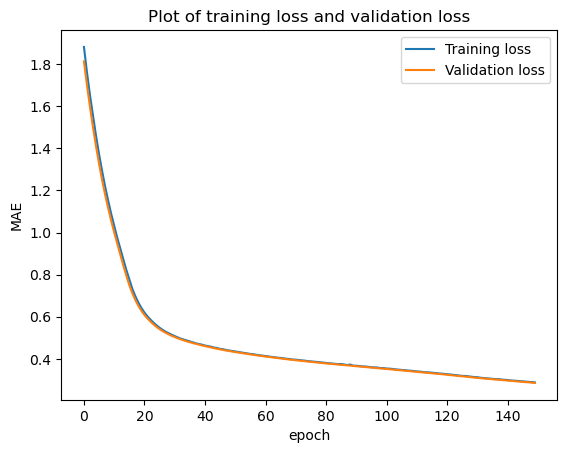

In [62]:
#plotting the training loss vs Validation loss using a line graph.
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Plot of training loss and validation loss')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

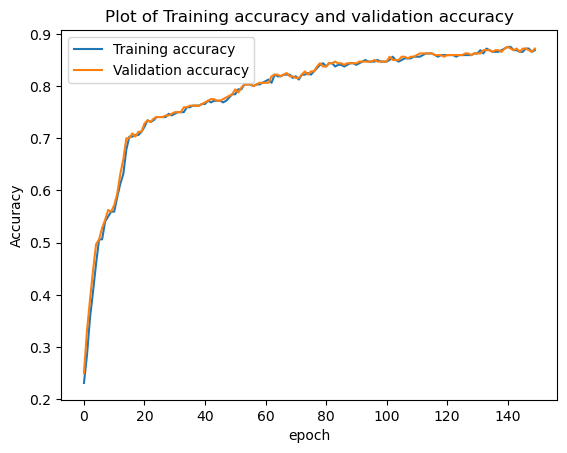

In [63]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title('Plot of Training accuracy and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#### Conclusion

* The Neural Network using DNN classifier and TF.Keras have been implemented to predict the quality of red wine, and the results show that the model has learned to classify the quality of red wine with an accuracy of around 90% and 86% respectively.

* This can serve as a starting point to further optimize the model by trying different architectures, adding more hidden layers, changing the number of neurons in each layer, etc.

* The model can also be evaluated using different metrics, such as precision, recall, F1 score, etc. to get a more comprehensive understanding of the model's performance.

* Overall, this model can be used as a tool to predict the quality of red wine, but it is important to keep in mind that this model is based on a limited dataset and may not generalize well to other datasets.